# Create plots for Figure 13

In [1]:
# Import necessary libraries
from __future__ import division, print_function, unicode_literals

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import tensorflow as tf
import numpy as np
from functools import partial
import glob, os
import pickle
import copy
from PDEsolvers import Burgers_Periodic

In [2]:
# User inputs
data_name = 'Burgers_Eqn_exp28'  # Prefix of data files
folder_name = 'Burgers_exp28rr/'  # Folder to be created for saved output

In [3]:
# Find the model with lowest validation error
import math

def BestErrorFile(folder_name):

    filename_best = ''
    best_error = 10**6

    current_dir = os.getcwd()
    os.chdir("./" + folder_name)
    for file in glob.glob("*.pkl"):
        with open(file, 'rb') as f:
            params = pickle.load(f)
            if not math.isnan(params['minRegTest']):
                if params['minRegTest'] < best_error:
                    filename_best = file
                    best_error = params['minRegTest']
    os.chdir(current_dir)

    return filename_best

pkl_file = folder_name + BestErrorFile(folder_name)

with open(pkl_file, 'rb') as f:
     params = pickle.load(f)

params['model_restore_path'] = params['model_path']
print(pkl_file)
print(params['minTest'])
print(params['minTrain'])

Burgers_exp28rr/Burgers_Eqn_exp28_2019_10_30_12_36_21_007819_model.pkl
0.002094701281748712
0.0015315725468099117


In [4]:
# Load data
data_test1 = np.load(('./data/%s_test1_x.npy' % data_name))
data_test2 = np.load(('./data/%s_test2_x.npy' % data_name))
data_test3 = np.load(('./data/%s_test3_x.npy' % data_name))
data_test4 = np.load(('./data/%s_test4_x.npy' % data_name))
data_test5 = np.load(('./data/%s_test5_x.npy' % data_name))
data_test_all = np.vstack([data_test1,data_test2,data_test3,data_test4,data_test5])


In [5]:
import helperfns

max_shifts_to_stack = helperfns.num_shifts_in_stack(params)
data_test_all_tensor = helperfns.stack_data(data_test_all, max_shifts_to_stack, params['val_len_time'])

In [6]:
# Get partially encoded
tf.reset_default_graph()

with tf.Session() as sess:
    saver = tf.train.import_meta_graph(params['model_path']+'.meta')
    saver.restore(sess, params['model_path'])
    
    # Partially  Encoded
    beg = 1
    end = max_shifts_to_stack+1
    tensor_list = ["encoder/v_k:0"]
    for k in np.arange(beg,end):
        tensor_list.append("encoder_"+str(k)+"/v_k:0") 
    test_partiallyencoded = sess.run(tensor_list, feed_dict={"x:0": data_test_all_tensor})
    
test_partiallyencoded = np.asarray(test_partiallyencoded)

INFO:tensorflow:Restoring parameters from ./Burgers_exp28rr/Burgers_Eqn_exp28_2019_10_30_12_36_21_007819_model.ckpt


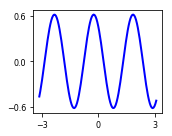

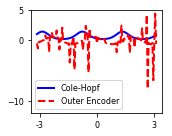

In [7]:
# Plot for IC = 1002
from scipy.integrate import cumtrapz

# Inputs
eps = 10
mu = 1
IC = 1002    # index of initial condition

partially_encoded = test_partiallyencoded
data_tensor = data_test_all_tensor

x_pts = np.linspace(-np.pi,np.pi,129)
x_pts = x_pts[0:128]  
    
f = data_tensor[0,IC,:]
int_vec = cumtrapz(f, x_pts, initial=0)
v = np.exp(-eps*int_vec/(2*mu))

plt.figure(figsize=(2.5,2))
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.plot(x_pts, data_tensor[0,IC,:], "b-", linewidth=2)
plt.xticks([-3,0,3])
plt.yticks([-0.6,0,0.6])
plt.tight_layout()
plt.show()

plt.figure(figsize=(2.5,2))
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.plot(x_pts, v, "b-", linewidth=2)
plt.plot(x_pts, partially_encoded[0,IC,:], "r--", linewidth=2)
plt.xticks([-3,0,3],["-3","0","3"])
plt.yticks([-10,0,5])
plt.ylim([-12,5])
plt.legend(['Cole-Hopf','Outer Encoder'],fontsize=8)
plt.tight_layout()
plt.show()


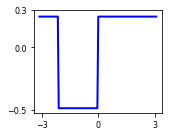

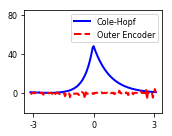

In [8]:
# Plot for IC = 2004
from scipy.integrate import cumtrapz

# Inputs
eps = 10
mu = 1
IC = 2004    # index of initial condition

partially_encoded = test_partiallyencoded
data_tensor = data_test_all_tensor

x_pts = np.linspace(-np.pi,np.pi,129)
x_pts = x_pts[0:128]  
    
f = data_tensor[0,IC,:]
int_vec = cumtrapz(f, x_pts, initial=0)
v = np.exp(-eps*int_vec/(2*mu))

plt.figure(figsize=(2.5,2))
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.plot(x_pts, data_tensor[0,IC,:], "b-", linewidth=2)
plt.xticks([-3,0,3])
plt.yticks([-0.5,0,0.3])
plt.tight_layout()
plt.show()

plt.figure(figsize=(2.5,2))
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.plot(x_pts, v, "b-", linewidth=2)
plt.plot(x_pts, partially_encoded[0,IC,:], "r--", linewidth=2)
plt.xticks([-3,0,3],["-3","0","3"])
plt.yticks([0,40,80])
plt.ylim([-20,85])
plt.legend(['Cole-Hopf','Outer Encoder'],fontsize=8)
plt.tight_layout()
plt.show()
